# Assignment 6: Assessment With Utility Functions

### House Sale Price Prediction  

### Question : Evaluate your models on a utility function (make one up if you have to). Report the results and the conclusion on which model best answers the data science question you asked. Also report which utility function you are using.

**I compared results from Random Forest, Gradient Boosting and Xgboost because they were the top performinbg models.**

The utility method is fairly simple. I take the difference between the actual price and the predicted price of a house. The assumption is, using the model, I will make all the trades as suggested by the model. In some cases I will take a loss and some transactions will make me a profit. Then I calculate the net difference between the actual and the predicted.

**The more the positive difference the better. It means that I have made much more profit than losses using the model**

The results are:
    1. Net differece using random forest: 11188890.999999996
    2. Net differece using gradient boosting: 2724149.204608976
    3. Net differece using extreme gradient boosting: 1063674.4375

As you can see using the Random Forest, I make the mose profit. It was also the model that has the least error rate. 

In [80]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.api.types import is_numeric_dtype
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso 
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import scipy.stats as stats
import json
import requests
from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import platform
print("Python version:", platform.python_version())

Python version: 3.7.3


In [3]:
try:
    train_data = pd.read_csv("kc_house_data.csv")
except:
    print("You might want to move the data in the current folder")

# Data Dimensionality

In [4]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
print("The number of rows in the training dataset is", train_data.shape[0])
print("The number of columns in the training dataset is", train_data.shape[1])

The number of rows in the training dataset is 21613
The number of columns in the training dataset is 21


In [6]:
pd.set_option('display.expand_frame_repr', False)
train_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Missing Value Analysis

Plotting the missing value frequency among dependent variables. 

In [7]:
sns.set_style("whitegrid")
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Series([], dtype: int64)

# Feature Engineering

<Figure size 864x864 with 0 Axes>

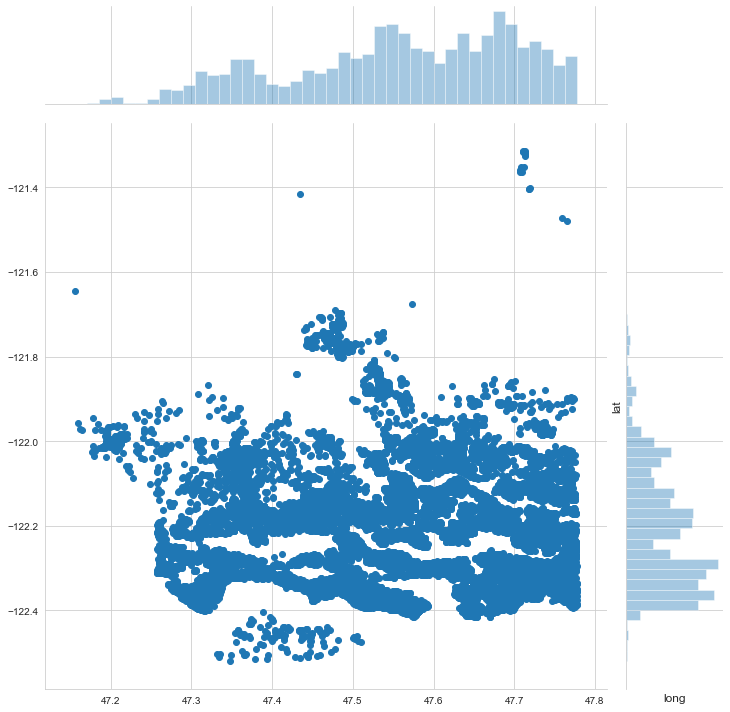

In [8]:
plt.figure(figsize=(12,12))
sns.jointplot(x=train_data.lat.values, y=train_data.long.values, size=10)
plt.ylabel('lat', fontsize=12)
plt.xlabel('long', fontsize=12)
plt.show()

Date Formatting:

In [9]:
train_data['date'] = pd.to_datetime(train_data['date'])

train_data['year_of_transaction'] = train_data['date'].dt.year
train_data['month_of_transaction'] = train_data['date'].dt.month

Make another feature named 'Year Average'

In [10]:
train_data['Year average']= (train_data['yr_built']+train_data['year_of_transaction'])/2

In [11]:
train_data['time_since_ren'] = 2020 - train_data['yr_renovated']

# Bivariate Analysis

Following are some visualizations of attributes that I think might be highly correlated to the target value. Therefore, I am plotting them to see how they interact with the target.

In [12]:
target = 'price'

Analysis between BedroomCnt and SalePrice

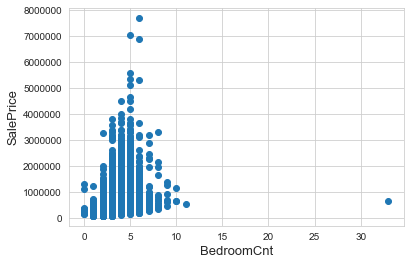

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['bedrooms'], y = train_data[target])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BedroomCnt', fontsize=13)
plt.show()

Analysis between BathroomCnt and SalePrice

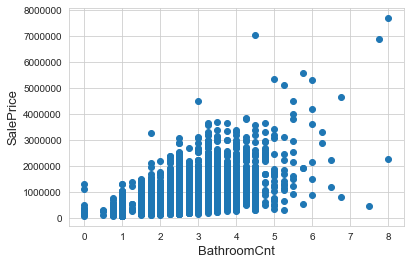

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['bathrooms'], y = train_data[target])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BathroomCnt', fontsize=13)
plt.show()

Analysis between LotSize and SalePrice

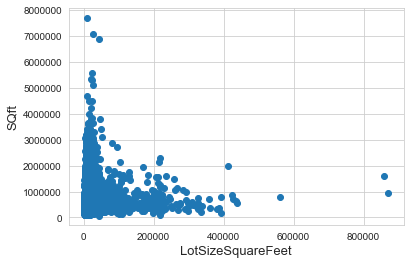

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['sqft_lot15'], y = train_data[target])
plt.ylabel('SQft', fontsize=13)
plt.xlabel('LotSizeSquareFeet', fontsize=13)
plt.show()

Analysis between ViewType and SalePrice

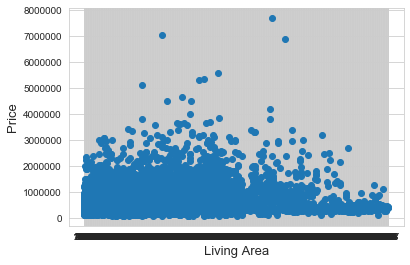

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['sqft_living15'].astype(str), y = train_data[target])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Living Area', fontsize=13)
plt.show()

# Analysing the Target Variable: SaleDollarCnt

In [17]:
target = 'price'

In [18]:
#descriptive statistics summary
train_data[target].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [19]:
train_data[target].min()

75000.0

In [20]:
#Checking if there is any nulls in the target variable
train_data[target].isna().any()

False

There does not seem to be any nulls in the target variable. 

In [21]:
train_data[train_data[target]==0][target].any()

False

In [22]:
#Sanity check to ensure if price >=0 
train_data[train_data[target]<0][target].any()

False

There are no junk negative values in the target. 

In [23]:
#Sanity Check to ensure that target is numeric only
is_numeric_dtype(train_data[target])

True

The target variable does not have any jumk non-numeric values.

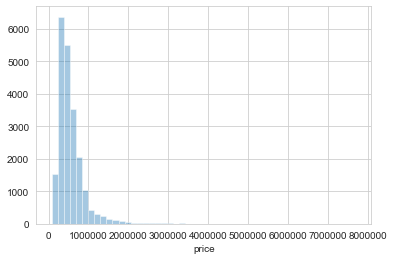

In [24]:
#histogram
sns.distplot(train_data[target], kde = False);

In [25]:
#skewness and kurtosis
print("Skewness: %f" % train_data[target].skew())
print("Kurtosis: %f" % train_data[target].kurt())

Skewness: 4.024069
Kurtosis: 34.585540


The data is highly skewed. The kurtosis is very high as well.

We should so an outlier analysis to figure out what is making the data so skewed

In [26]:
def reject_outliers(data, m=3): 
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75) 
    IQR = Q3 - Q1
    return data[(data < (Q3 + m * IQR))]

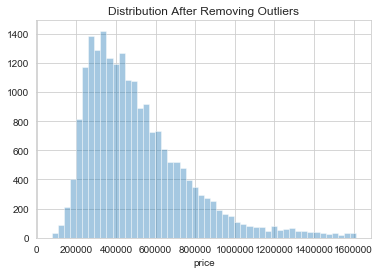

In [27]:
#histogram
sns.distplot(reject_outliers(train_data[target]), kde = False);
plt.title('Distribution After Removing Outliers')
plt.show()

After removing outliers, the distributions seems normal but is still positively right skewed.

I was in a dilemma as to whether remove the outliers from the data. The dataset is already small and removing more data points will take away information. So, first I calculated what will be the data loss/ 

In [28]:
data_loss = train_data[target].shape[0] - reject_outliers(train_data[target]).shape[0]
data_loss

420

## Normality Analysis of Target Variable

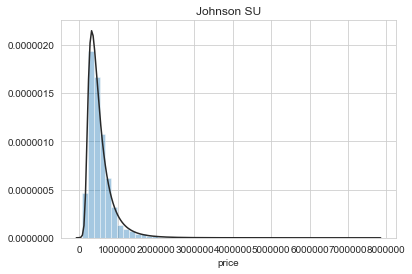

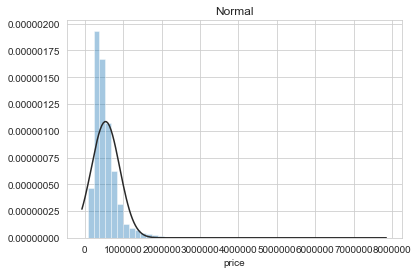

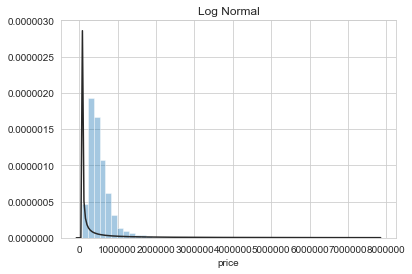

In [29]:
target_col = train_data[target]
plt.figure(1); plt.title('Johnson SU')
sns.distplot(target_col, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(target_col, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(target_col, kde=False, fit=stats.lognorm)
plt.show()

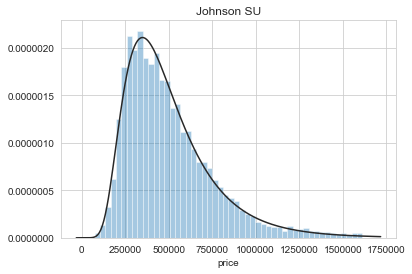

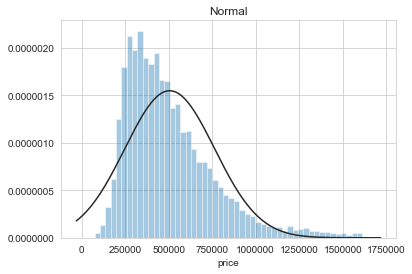

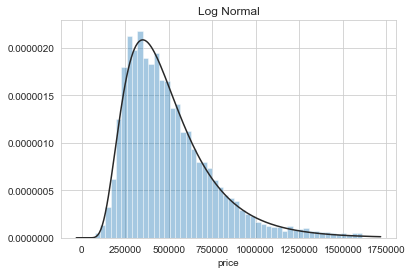

In [30]:
target_col = reject_outliers(train_data[target])
plt.figure(1); plt.title('Johnson SU')
sns.distplot(target_col, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(target_col, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(target_col, kde=False, fit=stats.lognorm)
plt.show()

As we can observe, that Johnsun SU transformation on data without outliers gives a better fit.

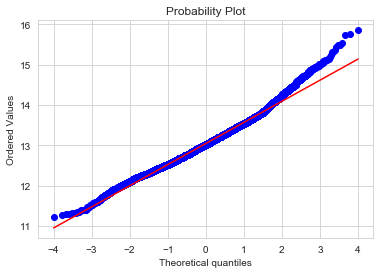

In [31]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(train_data[target]), plot=plt)
plt.show()

Traget ditribution is more or less normal

In [32]:
#skewness and kurtosis
print("Skewness: %f" % np.log1p(train_data[target]).skew())
print("Kurtosis: %f" % np.log1p(train_data[target]).kurt())

Skewness: 0.428077
Kurtosis: 0.691857


In [33]:
train_data.shape

(21613, 25)

##  Analysis of Quantitative Variables

In [34]:
def getNumericColumns(data_frame):
    quantitative = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
    return quantitative

In [35]:
#Get Quantitative Variables
quant_vars = getNumericColumns(train_data)
quant_vars.remove('date')
quant_vars


['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year_of_transaction',
 'month_of_transaction',
 'Year average',
 'time_since_ren']

## Shapiro Test for Normality 

In [36]:
# normality test
stat, p = stats.shapiro(train_data[quant_vars])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.170, p=0.000
Sample does not look Gaussian (reject H0)


According to the Shapiro-Wilks test, the sample is not gaussian.



# Visualizing Normality

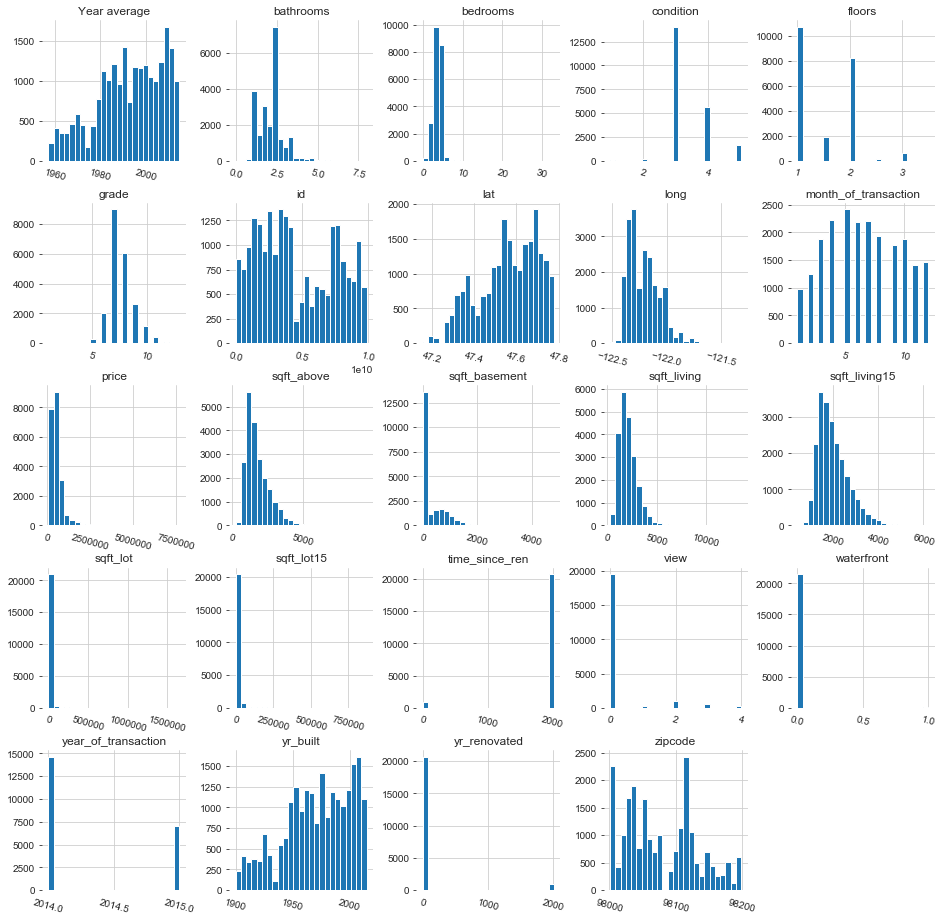

In [37]:
df1=train_data[quant_vars]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [38]:
print("There are in total ", len(quant_vars), " numerical columns and most of them are not normally distributed. We will transform them later when we do transformations")

There are in total  24  numerical columns and most of them are not normally distributed. We will transform them later when we do transformations


# Outlier Analysis

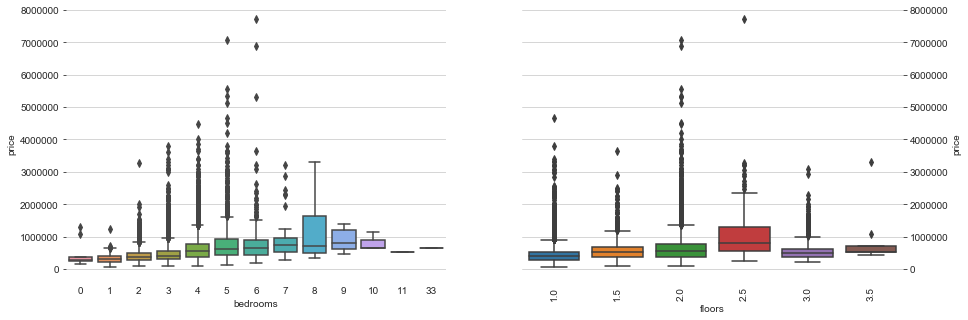

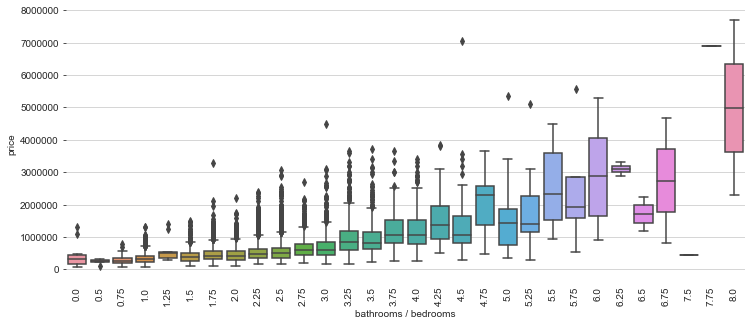

In [39]:
df = train_data
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df[target], ax=axes[0])
plt.xticks(rotation=90)
sns.boxplot(x=df['floors'],y=df[target], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='bedrooms', ylabel=target)
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='floors', ylabel=target)
plt.xticks(rotation=90)

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df[target], ax=axe)
plt.xticks(rotation=90)
axe.yaxis.tick_left()
axe.set(xlabel='bathrooms / bedrooms', ylabel=target);

## Analysis of potential categorical variables

Some numerical columns can be incorrectly perceived as numerical. I wanted to analyse if there are any potentially categorical variables that are incorrectly labelled as numeric. 
Therefore, for all categorical variables I checked if the top 10 frequently coccuring values describe 70% of the population. 

In [40]:
top_n = 10 
likely_cat = {}
for var in train_data.columns:
    likely_cat[var] = 1.*train_data[var].value_counts(normalize=True).head(top_n).sum() > 0.7

In [41]:
for k,v in likely_cat.items():
    if v == True:
        print(k)
        print(train_data[k].value_counts())

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64
waterfront
0    21450
1      163
Name: waterfront, dtype: int64
view
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64
grade
7     8981
8     6068
9    

**Results**:

1. **Census Block Group** : As you can see, census block year only has one value and therefore provides no information as the data. So, later I will delete this variable. 

2. **UseCode** : As you can see, UseCode only has one value and therefore provides no information as the data. So, later I will delete this variable. 

3. **Bathroom Count** : The values are few but are ordinal in nature. So, I will use label encoding to make them numerical.

4. **Bedroom Count** : The values are few but are ordinal in nature. So, I will use label encoding to make them numerical.

5. **Story Count** : I was really confused whether to make it ordinal or categorical. In the end decided to make it numerical. 

6. **View Type** : The values are few but are categorical in nature. In the end decided to make it categorical.


Looks like we will only lose 420 rows of data. Still, I was concerened about the data loss. 
So I plotted the three normal forms on entire data and then the data without the outliers. 

Handling Missing Values

In [42]:
#Categorical missing values
NAcols=train_data.columns
for col in NAcols:
    if train_data[col].dtype == "object":
        train_data[col] = train_data[col].fillna("None")

In [43]:
#Numerical missing values
num_feats = []
for col in NAcols:
    if col not in [target]:
        if train_data[col].dtype not in  ["object", "datetime64[ns]"]:
            train_data[col]= train_data[col].fillna(0)
            num_feats.append(col)

Label Encoding:

In [44]:
#Label Encoding
feats = train_data.columns[1:-1]  
for c in feats:
    if train_data[c].dtype == 'object':
            print(c)
            lbl = LabelEncoder()
            lbl.fit(list(train_data[c].values))
            train_data[c] = lbl.transform(list(train_data[c].values))

Standard Scaling:

In [45]:
ss = StandardScaler()
ss.fit(train_data[num_feats])
train_data[num_feats] = ss.transform(train_data[num_feats])

# Correlation Analysis

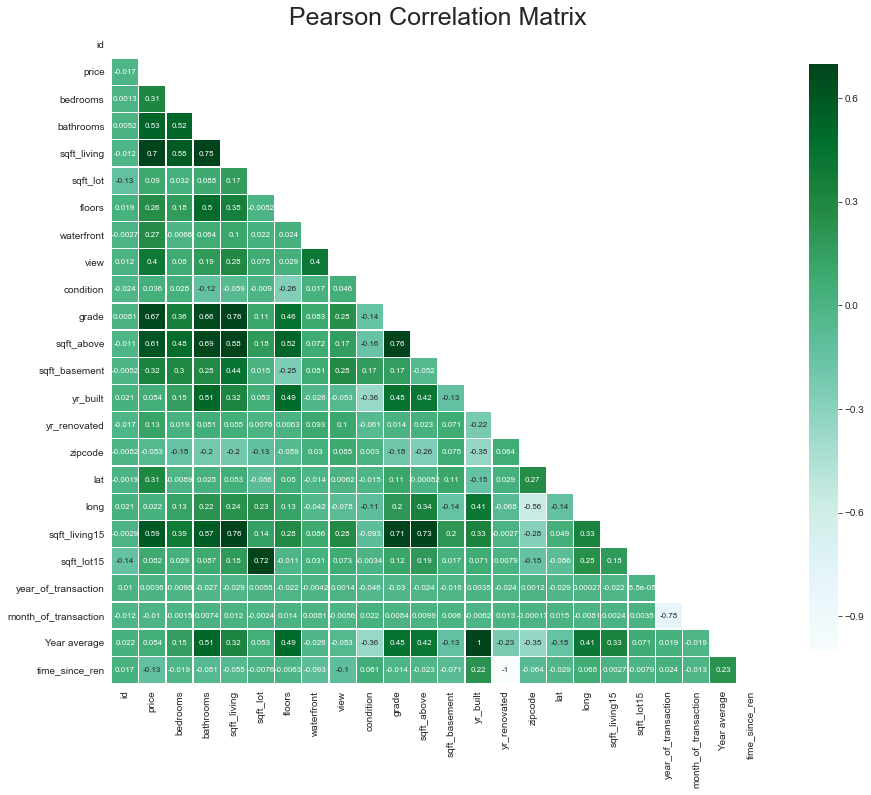

In [46]:
features = quant_vars
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Pipelines and Modelling

In [47]:
#y = np.log1p(train_data[target])
y = train_data[target]
X = train_data.drop([target, 'date'], axis = 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [49]:
categorical = X_train.dtypes == object

In [50]:
categorical

id                      False
bedrooms                False
bathrooms               False
sqft_living             False
sqft_lot                False
floors                  False
waterfront              False
view                    False
condition               False
grade                   False
sqft_above              False
sqft_basement           False
yr_built                False
yr_renovated            False
zipcode                 False
lat                     False
long                    False
sqft_living15           False
sqft_lot15              False
year_of_transaction     False
month_of_transaction    False
Year average            False
time_since_ren          False
dtype: bool

In [51]:
#linear_pipe_scale = make_pipeline(preprocess_trans_scale, LinearRegression()) 
ridge_pipe_scale = make_pipeline( Ridge()) 
lasso_pipe_scale = make_pipeline( Lasso())
elastic_net_scale = make_pipeline( ElasticNet()) 
rf_pipe_scale = make_pipeline( RandomForestRegressor()) 
gb_pipe_scale = make_pipeline( GradientBoostingRegressor()) 
dt_pipe_scale = make_pipeline( DecisionTreeRegressor()) 
svr_pipe_scale = make_pipeline( SVR())
xgb_pipe_scale = make_pipeline( XGBRegressor())

In [52]:
#scores_linear_pipe_scale = cross_val_score(linear_pipe_scale, X_train, y_train, cv=3) 
scores_ridge_pipe_scale = cross_val_score(ridge_pipe_scale, X_train, y_train, cv=3) 
scores_lasso_pipe_scale = cross_val_score(lasso_pipe_scale, X_train, y_train, cv=3) 
scores_elastic_net_scale = cross_val_score(elastic_net_scale, X_train, y_train, cv=3) 
scores_rf_pipe_scale = cross_val_score(rf_pipe_scale, X_train, y_train, cv=3)
scores_gb_pipe_scale = cross_val_score(gb_pipe_scale, X_train, y_train, cv=3)
scores_xgb_pipe_scale = cross_val_score(xgb_pipe_scale, X_train, y_train, cv=3)

[15:16:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
#print("Linear reg R2 value using scale is", np.mean(scores_linear_pipe_scale)) 
print("Ridge reg R2 value using scale is", np.mean(scores_ridge_pipe_scale)) 
print("Lasso reg R2 value using scale is", np.mean(scores_lasso_pipe_scale)) 
print("Elastic net R2 value using scale is", np.mean(scores_elastic_net_scale)) 
print("Random forest R2 value using scale is", np.mean(scores_rf_pipe_scale)) 
print("Gradient Boosted R2 value using scale is", np.mean(scores_gb_pipe_scale))
print("Xtreme Gradient Boosted R2 value using scale is", np.mean(scores_xgb_pipe_scale))

Ridge reg R2 value using scale is 0.6992545083699099
Lasso reg R2 value using scale is 0.6992533575167489
Elastic net R2 value using scale is 0.6714262218157024
Random forest R2 value using scale is 0.8380427076053337
Gradient Boosted R2 value using scale is 0.8524444123878352
Xtreme Gradient Boosted R2 value using scale is 0.8510601031490141


In [54]:
model = {}

#model['linear'] = linear_pipe_scale.fit(X_train, y_train) 
model['ridge'] = ridge_pipe_scale.fit(X_train, y_train) 
model['lasso'] = lasso_pipe_scale.fit(X_train, y_train) 
model['elastic'] = elastic_net_scale.fit(X_train, y_train) 
model['rf'] = rf_pipe_scale.fit(X_train, y_train) 
model['gb'] = gb_pipe_scale.fit(X_train, y_train)
model['xgb'] = xgb_pipe_scale.fit(X_train, y_train)

[15:17:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [55]:
predict_dict = {}

#predict_dict['linear'] = np.expm1(model['linear'].predict(X_test)) 
predict_dict['ridge'] = (model['ridge'].predict(X_test))
predict_dict['lasso'] = (model['lasso'].predict(X_test))
predict_dict['elastic'] = (model['elastic'].predict(X_test)) 
predict_dict['rf'] = (model['rf'].predict(X_test)) 
predict_dict['gb'] = (model['gb'].predict(X_test))
predict_dict['xgb'] = (model['xgb'].predict(X_test))

In [56]:
def avg_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

aape_error = {}

#aape_error['linear'] = avg_absolute_percentage_error(predict_dict['linear'], y_test) 
aape_error['ridge'] = avg_absolute_percentage_error(predict_dict['ridge'], y_test) 
aape_error['lasso'] = avg_absolute_percentage_error(predict_dict['lasso'], y_test) 
aape_error['elastic'] = avg_absolute_percentage_error(predict_dict['elastic'], y_test) 
aape_error['rf'] = avg_absolute_percentage_error(predict_dict['rf'], y_test) 
aape_error['gb'] = avg_absolute_percentage_error(predict_dict['gb'], y_test)
aape_error['xgb'] = avg_absolute_percentage_error(predict_dict['xgb'], y_test)

In [57]:
#print("The aape error for Linear regression is ", aape_error['linear']) 
print("The aape error for Ridge regression is ", aape_error['ridge']) 
print("The aape error for Lasso regression is ", aape_error['lasso']) 
print("The aape error for Elastic net regression is ", aape_error['elastic']) 
print("The aape error for Random Forest regression is ", aape_error['rf']) 
print("The aape error for Gradient Boosted regression is ", aape_error['gb'])
print("The aape error for Xtreme Gradient Boosted regression is ", aape_error['xgb'])

The aape error for Ridge regression is  35.08451193624053
The aape error for Lasso regression is  35.08664017132228
The aape error for Elastic net regression is  25.372988470200696
The aape error for Random Forest regression is  13.399154667246126
The aape error for Gradient Boosted regression is  13.887488867333959
The aape error for Xtreme Gradient Boosted regression is  14.049130295292024


In [58]:
def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mape_error = {}

#mape_error['linear'] = median_absolute_percentage_error(predict_dict['linear'], y_test) 
mape_error['ridge'] = median_absolute_percentage_error(predict_dict['ridge'], y_test) 
mape_error['lasso'] = median_absolute_percentage_error(predict_dict['lasso'], y_test) 
mape_error['elastic'] = median_absolute_percentage_error(predict_dict['elastic'], y_test) 
mape_error['rf'] = median_absolute_percentage_error(predict_dict['rf'], y_test) 
mape_error['gb'] = median_absolute_percentage_error(predict_dict['gb'], y_test)
mape_error['xgb'] = median_absolute_percentage_error(predict_dict['xgb'], y_test)

In [59]:
#print("The mape error for Linear regression is ", mape_error['linear']) 
print("The mape error for Ridge regression is ", mape_error['ridge']) 
print("The mape error for Lasso regression is ", mape_error['lasso']) 
print("The mape error for Elastic net regression is ", mape_error['elastic']) 
print("The mape error for Random Forest regression is ", mape_error['rf']) 
print("The mape error for Gradient Boosted regression is ", mape_error['gb'])
print("The mape error for Xtreme Gradient Boosted regression is ", mape_error['xgb'])

The mape error for Ridge regression is  18.603614815527937
The mape error for Lasso regression is  18.599841159687436
The mape error for Elastic net regression is  18.300722638785555
The mape error for Random Forest regression is  9.611701609853759
The mape error for Gradient Boosted regression is  10.540200672335425
The mape error for Xtreme Gradient Boosted regression is  10.663399225602527


In [60]:
pd.options.display.float_format = '{:.2f}'.format
res = pd.DataFrame()
res['actual'] = (y_test)
res['pred'] = (predict_dict['rf'])
res['differ'] = (res['actual'] - res['pred'])

# The residual plot

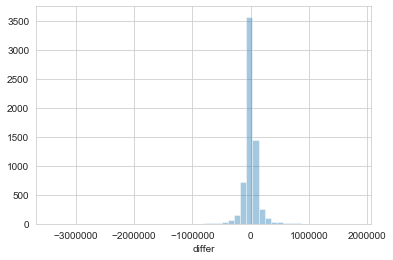

In [61]:
sns.distplot(res['differ'], kde = False);

# Actual vs. Predicted

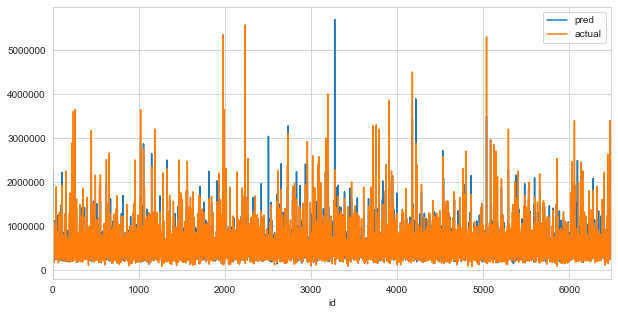

In [62]:
res['id'] = list(range(6484))
res.plot(x = 'id' ,y=['pred', 'actual'], figsize=(10,5), grid=True)

# Utility Function

In [71]:
res_rf = pd.DataFrame()
res_rf['actual'] = (y_test)
res_rf['pred'] = (predict_dict['rf'])
res_rf['differ'] = (res_rf['actual'] - res_rf['pred'])
print("Net differece using random forest:", sum(res_rf['differ']))

Net differece using random forest: 11188890.999999996


In [72]:
res.head(5)

,actual,pred,differ,id
735,365000.00,363345.00,1655.00,0
2830,865000.00,895850.00,-30850.00,1
4106,1038000.00,1109450.00,-71450.00,2
16218,1490000.00,2233010.00,-743010.00,3
19964,711000.00,685250.00,25750.00,4


In [76]:
res_gb = pd.DataFrame()
res_gb['actual'] = (y_test)
res_gb['pred'] = (predict_dict['gb'])
res_gb['differ'] = (res_gb['actual'] - res_gb['pred'])
print("Net differece using gradient boosting:", sum(res_gb['differ']))

Net differece using gradient boosting: 2724149.204608976


In [77]:
res.head(5)

,actual,pred,differ,id
735,365000.00,363345.00,1655.00,0
2830,865000.00,895850.00,-30850.00,1
4106,1038000.00,1109450.00,-71450.00,2
16218,1490000.00,2233010.00,-743010.00,3
19964,711000.00,685250.00,25750.00,4


In [78]:
res_xgb = pd.DataFrame()
res_xgb['actual'] = (y_test)
res_xgb['pred'] = (predict_dict['xgb'])
res_xgb['differ'] = (res_xgb['actual'] - res_xgb['pred'])
print("Net differece using extreme gradient boosting:", sum(res_xgb['differ']))

Net differece using extreme gradient boosting: 1063674.4375


In [79]:
res.head(5)

,actual,pred,differ,id
735,365000.00,363345.00,1655.00,0
2830,865000.00,895850.00,-30850.00,1
4106,1038000.00,1109450.00,-71450.00,2
16218,1490000.00,2233010.00,-743010.00,3
19964,711000.00,685250.00,25750.00,4
